In [12]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.metrics as skim
import torch
from torchvision import transforms

from img_utils import ImageLoader
from kernels import gaussian_kernel_generator
from operators import BlurOperator
from transforms import image_normalization

In [13]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
normalization = transforms.Compose([image_normalization()])
image_loader = ImageLoader('data/material_pt_nr/validate.png', device=DEVICE, transform=normalization)
ground_truth = image_loader[0].to(DEVICE)

In [15]:
kernel_size = 15
kernel_std = 9

In [127]:
noise_std = 1

In [128]:
gaussian_kernel = gaussian_kernel_generator(kernel_size, kernel_std).to(DEVICE)
blur_operator = BlurOperator(gaussian_kernel, device=DEVICE)

In [129]:
degraded_image = blur_operator(ground_truth)
c, w, h = degraded_image.shape
error_dim = w * h
noise_vector_std1 = torch.reshape(torch.tensor(np.random.normal(0, noise_std, error_dim), device=DEVICE), (1, w, h))
noise_degraded_image = ground_truth + normalization(noise_vector_std1 * 5.)

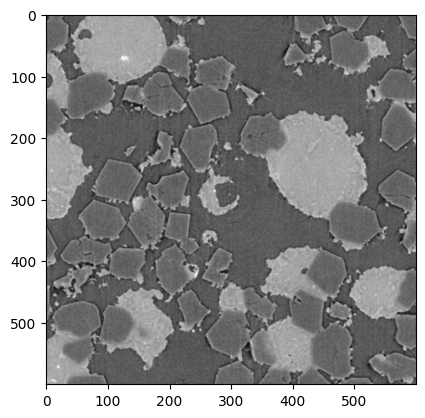

In [130]:
plt.imshow(noise_degraded_image.cpu().squeeze(), cmap='gray')

In [131]:
skim.peak_signal_noise_ratio(ground_truth.cpu().numpy(), noise_degraded_image.cpu().numpy())

/var/tmp/ipykernel_2870/1253152829.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  skim.peak_signal_noise_ratio(ground_truth.cpu().numpy(), noise_degraded_image.cpu().numpy())


34.18951029941907

In [132]:
mssim, img  = skim.structural_similarity(ground_truth.cpu().numpy().squeeze(), noise_degraded_image.cpu().numpy().squeeze(), win_size=15, data_range=1., full=True)

In [133]:
mssim

0.9092189516122718

In [138]:
a = np.ones(10)
b = np.ones(5)

In [139]:
zip(a, b)

In [144]:
np.linspace(0, 10, 2)

array([ 0., 10.])